#**Projet - Régression logistique**

But : implémenter la régression logistique et mettre en oeuvre une méthodologie solide

Cours : M1 MIAGE apprentissage (Dauphine) - 2023-2024

Projet en binôme

A rendre :
*   Code ayant permis de résoudre les différentes questions (Notebook Python) - commenté pour permettre son exécution
*   Rapport en PDF (moins de 20 pages)

Date : le 01/12/2023 (avant 20h - heure de Paris)

In [31]:
# libairies utiles pour ce cours

# jeu de données
import sklearn as sk
from sklearn import datasets, model_selection

# calcul numériques (calculs d'estimateurs)
import numpy as np

#figures et illustrations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [32]:
#generation de données
n=100
rng = np.random.RandomState(2)
X,y = sk.datasets.make_classification(n_samples=n, n_features=2, n_redundant=0, n_informative=2, n_repeated=0, n_clusters_per_class=1, random_state=rng)

dim =2

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=.2, random_state=42)

# inclure cette ligne pour la question II.7
#X_train[0,:] = [5,5]

Xb=np.column_stack((X_train,np.ones(X_train.shape[0])))
Xtb=np.column_stack((X_test,np.ones(X_test.shape[0])))

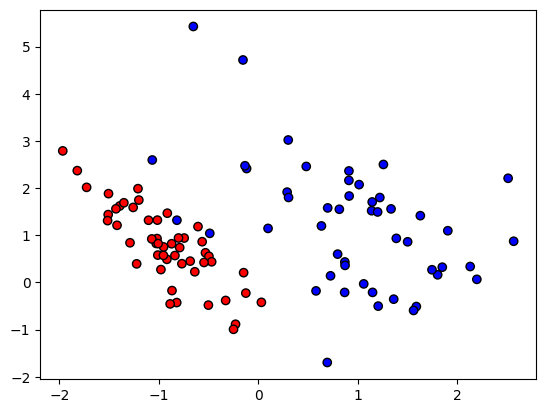

In [33]:
figure = plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')

## I Regression logistique (8pts)

1.   En vous appuyant sur le code écrit pour le TP 2 (notamment la descente de gradient), implémenter la régression logistique (2pts)

  /!\ /!\  *il faudra modifier le code ou le problème d'optimisation car dans le TP2, on minimisait une fonction et là, on maximise une fonction* /!\ /!\
2. Calculer $\beta$, les paramètres de la frontière de décision (1 pt)
8. prédire la classe du point $x = \left( \begin{array}{c}
0 \\
0 \end{array} \right)$ (1 pt)
9. Représenter la frontière de décision (en ré-utilisant le code écrit pour le TP 1) (1pt)
10. Développer une fonction de calcul de taux d'erreur d'un modèle. Appliquer ce code pour estimer le taux d'erreur (en apprentissage et en test) de votre modèle de régression logistique. (1pt)
11. Comparer ces résultats (frontière de décisions et taux d'erreurs) à ceux obtenus sur ces données par votre code de LDA (développé pour le TP 1) - commenter (2 pts)

In [34]:
def sigmoid(beta, x):
  return 1/(1+np.exp(-np.dot(x,beta)))

Itération 1000, Négative Loss: 0.09015072216923108
Itération 2000, Négative Loss: 0.0814430791921649
Itération 3000, Négative Loss: 0.07778691213021965
Itération 4000, Négative Loss: 0.07558159800192944
Itération 5000, Négative Loss: 0.07404024471622746
Itération 6000, Négative Loss: 0.0728746004797907
Itération 7000, Négative Loss: 0.07194959310965092
Itération 8000, Négative Loss: 0.07119163314607654
Itération 9000, Négative Loss: 0.07055628971837209
Itération 10000, Négative Loss: 0.07001466676938481
Paramètre finale : 
 [[7.09749757]
 [2.83519225]
 [0.19240188]]


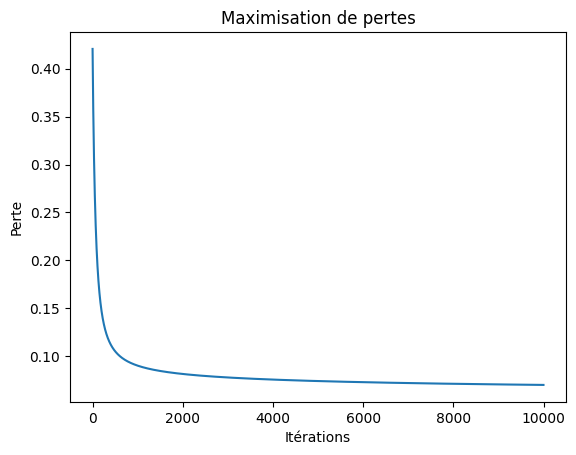

In [35]:
# descente de gradient
def gradient_descent(Xb, y_train, eta=1e-3, itermax=10000, epsilon=1e-8):
    dim = Xb.shape[1] - 1  # dimension de l'échantillon en enlevant la colonne de 1 (bias)
    beta = np.random.normal(size=(dim+1, 1))
    i = 1
    loss = []  # calcul de la fonction cout à chaque iteration
    loss_old = np.inf # ici -np.inf pour maximiser la fonction de perte, np.inf pour minimiser
    y_train = y_train.reshape(-1, 1)
    while(i <= itermax):
        beta_old = beta

        # Prédiction
        preds = sigmoid(beta, Xb)

        # Calcul du gradient
        # pour minization : 
        # grad = Xb.T @ (preds - y_train)
        grad = Xb.T @ (preds - y_train)

        # mise à jour le paramètre de l'hyperplan de l'itéré courant
        beta = beta_old - eta * grad # ajoute du gradient pour maximiser, soustrait pour minimiser

        # Calcul de la fonction de perte
        # pour minization : 
        # loss_new = - np.mean(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))
        loss_new = - np.mean(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))

        loss.append(loss_new)  # Append loss to the list

        # Critère de stabilité
        if np.linalg.norm(beta_old - beta) < epsilon: # inverse de minisization
            print("diff iterate")
            break

        # Critère de performance 
        if loss_new > loss_old: # inverse de minisization
            print("decreasing loss")
            break

        i += 1 
        loss_old = loss_new 

        if i % 1000 == 0:
            print(f"Itération {i}, Négative Loss: {loss_new}")
        
    return beta, loss

beta, loss = gradient_descent(Xb, y_train)
print("Paramètre finale : \n", beta)
plt.plot(loss)
plt.title("Maximisation de pertes")
plt.xlabel("Itérations")
plt.ylabel("Perte")
plt.show()


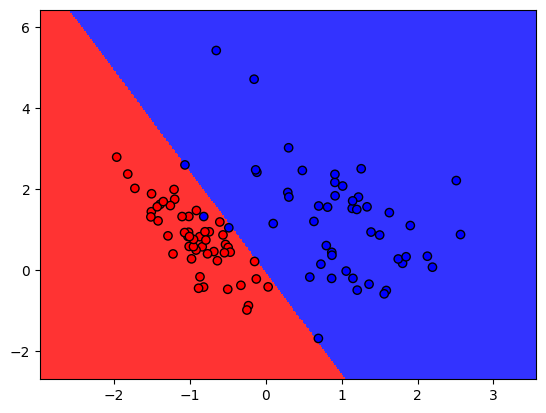

In [36]:
# frontière de décision
def decision_boundary(beta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = .02

    xlim = np.arange(x_min, x_max, h)
    ylim = np.arange(y_min, y_max, h)

    xx, yy = np.meshgrid(xlim, ylim)

    # ajouter une colonne de 1 pour le biais
    Xtest = np.column_stack((xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])))
    ypred = sigmoid(beta, Xtest)
    ypred = ypred.reshape(xx.shape)

    figure = plt.figure()
    plt.pcolormesh(xx, yy, ypred, cmap=cm_bright, shading='auto', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')

decision_boundary(beta, X, y)

In [37]:
# taux d'erreur
def error_rate(y,y_pred):
    return np.mean(y != y_pred)

In [45]:
# comparaison avec le LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("Taux d'erreur LDA : ",error_rate(y_test,y_pred_lda))

# comparaison avec le LogisticRegression
y_pred_log = sigmoid(beta, Xtb)
y_pred_log = (y_pred_log >= 0.5).astype(int)
print("Taux d'erreur LogisticRegression : ",error_rate(y_test,y_pred_log))

# comparaison avec le LogisticRegression de sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Taux d'erreur LogisticRegression de sklearn : ",error_rate(y_test,y_pred_logreg))

Taux d'erreur LDA :  0.05
Taux d'erreur LogisticRegression :  0.44
Taux d'erreur LogisticRegression de sklearn :  0.05


## II Méthodologie (5pts)

7. inclure une ligne permettant d'ajouter un outlier dans les données d'apprentissage (ligne commentée dans le bloc de génération de données).
Comparez les résultats de vos codes de régression logistique et de LDA sur ces données. Commenter (1pt)
8. en plus des taux d'erreurs en apprentissage et en test, appliquer une statégie de validation croisée à n blocs et reporter les taux d'erreur (moyenne et variance) des deux modèles. (2pts)
9. modifier le code de génération de données (en augmentant le nombre de dimensions et en ajoutant des variables correlées). Comparer le comportement des deux modèles (2pts)      *(on commentera à nouveau la ligne de génération d'outlier pour cette question)*



## III A vous de jouer (7 pts)
10. Trouver/Générer/Récolter des données adéquates pour l'application d'un algorithme de classification binaire. Décrire ces données (origine, nombre et types de variables, analyse statistique des variables, nombre d'observations, contexte,...) (2pts)
11. Appliquer vos codes de régression logistique et de LDA et reporter les performances obtenues (en apprentissage, en test ou en validation croisées) et commenter (1pts)
12. Trouver une autre méthode à laquelle comparer les deux codes que vous avez développés, décrire (brièvement) le fonctionnement de cette troisème approche et l'appliquer sur les données (de la question 10). On pourra développer soit-même le code ou utiliser une librairie existante. Comparer et discuter les performances obtenues (4pts)